# EDA on Spotify global 2019 most-streamed tracks

## On Spotify and this dataset

#### Spotify is freemium audio streaming service launched on 2008. This dataset compiles the most streamed tracks on the year 2019 along with the characteristics of each track. You can look up more about the audio characteristics definitions given by Spotify on their website:  https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

## The goal of this exploratory data analysis

#### Figure out the traits of the most listened songs on Spotify

## 1. Importing required libraries

In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/spotify-global-2019-moststreamed-tracks/spotify_global_2019_most_streamed_tracks_audio_features.csv


In [48]:
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

## 2. Displaying a preview of the dataset

In [49]:
df = pd.read_csv("/kaggle/input/spotify-global-2019-moststreamed-tracks/spotify_global_2019_most_streamed_tracks_audio_features.csv")
df.head(5)

,Country,Rank,Track_id,Streams,Track Name,Artist,URL,acousticness,danceability,energy,...,valence,tempo,time_signature,duration_ms,key,mode,Artist_id,Artist_popularity,Artist_follower,Artist_img
0,global,1.0,25sgk305KZfyuqVBQIahim,1166185736,Sweet but Psycho,Ava Max,https://open.spotify.com/track/25sgk305KZfyuqV...,0.0691,0.719,0.704,...,0.628,133.002,4,187436,1,1,4npEfmQ6YuiwW1GpUmaq3F,87,1025358,https://i.scdn.co/image/4b914c6470c8458674538a...
1,global,2.0,2Fxmhks0bxGSBdJ92vM42m,1052358787,bad guy,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,0.3280,0.701,0.425,...,0.562,135.128,4,194088,7,1,6qqNVTkY8uBg9cP3Jd7DAH,98,18867904,https://i.scdn.co/image/2622edec99d68d1d141886...
2,global,3.0,6ocbgoVGwYJhOv1GgI9NsF,789094044,7 rings,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,0.5920,0.778,0.317,...,0.327,140.048,4,178627,1,0,66CXWjxzNUsdJxJ2JdwvnR,97,40958727,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
3,global,4.0,1rgnBhdG2JDFTbYkYRZAku,764208309,Dance Monkey,Tones and I,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,0.6880,0.825,0.593,...,0.540,98.078,4,209755,6,0,2NjfBq1NflQcKSeiDooVjY,92,484241,https://i.scdn.co/image/c128f5ef4d210a67610acd...
4,global,5.0,6v3KW9xbzN5yKLt9YKDYA2,763064359,Señorita,Shawn Mendes,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,0.0392,0.759,0.548,...,0.749,116.967,4,190800,9,0,7n2wHs1TKAczGzO7Dd2rGr,94,23152263,https://i.scdn.co/image/6bd59cfbd3e1e6394af710...


In [50]:
df.tail(5)

,Country,Rank,Track_id,Streams,Track Name,Artist,URL,acousticness,danceability,energy,...,valence,tempo,time_signature,duration_ms,key,mode,Artist_id,Artist_popularity,Artist_follower,Artist_img
1712,global,1713.0,27SdWb2rFzO6GWiYDBTD9j,554971,Cheap Thrills,Sia,https://open.spotify.com/track/27SdWb2rFzO6GWi...,0.0472,0.628,0.698,...,0.732,89.976,4,211667,6,0,5WUlDfRSoLAfcVSX1WnrxN,90,15317280,https://i.scdn.co/image/652b6bb0dfaf8aa444f441...
1713,global,1714.0,0kLA41xkWzzYzMIEGFuDkP,544655,HaifischNikez Allstars,LX,https://open.spotify.com/track/0kLA41xkWzzYzMI...,0.1620,0.764,0.744,...,0.507,87.538,4,182925,11,0,10XY9PZCJKzUFzZOdtlQLU,71,64625,https://i.scdn.co/image/60d0c075d6de8417a0c44d...
1714,global,1715.0,79hJaqmVdohltPBNN6BULM,536886,"Stayin' Alive - From ""Saturday Night Fever"" So...",Bee Gees,https://open.spotify.com/track/79hJaqmVdohltPB...,0.0700,0.708,0.567,...,0.955,103.606,4,281667,10,0,1LZEQNv7sE11VDY3SdxQeN,79,2834719,https://i.scdn.co/image/1d5a05673975ba0c378cd2...
1715,global,1716.0,7rLegaz7zKB6EtDNzcslKE,536447,Medley da Gaiola - Dennis DJ Remix,MC Kevin o Chris,https://open.spotify.com/track/7rLegaz7zKB6EtD...,0.7110,0.896,0.756,...,0.686,140.076,4,240000,4,0,2UMj7NCbuqy1yUZmiSYGjJ,84,1139072,https://i.scdn.co/image/984dfbcdcf7880b022478b...
1716,global,1717.0,0kCqaybZgYcLYxzZymmBoc,524230,"Quem Pegou, Pegou - Ao Vivo",Henrique & Juliano,https://open.spotify.com/track/0kCqaybZgYcLYxz...,0.2990,0.690,0.670,...,0.579,104.022,4,184326,9,1,3p7PcrEHaaKLJnPUGOtRlT,84,9577443,https://i.scdn.co/image/f9e65e111cbb16276d2c27...


In [51]:
df.dtypes

Country               object
Rank                 float64
Track_id              object
Streams                int64
Track Name            object
Artist                object
URL                   object
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
liveness             float64
loudness             float64
speechiness          float64
valence              float64
tempo                float64
time_signature         int64
duration_ms            int64
key                    int64
mode                   int64
Artist_id             object
Artist_popularity      int64
Artist_follower        int64
Artist_img            object
dtype: object

## 3. Cleaning the dataset of irrelevant columns for this analysis

In [52]:
new_df = df.drop(['Country', 'Track_id', 'URL', 'Artist_id', 'Artist_img'], axis=1)
new_df.head(10)

,Rank,Streams,Track Name,Artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,duration_ms,key,mode,Artist_popularity,Artist_follower
0,1.0,1166185736,Sweet but Psycho,Ava Max,0.0691,0.719,0.704,0.000000,0.1660,-4.724,0.0476,0.628,133.002,4,187436,1,1,87,1025358
1,2.0,1052358787,bad guy,Billie Eilish,0.3280,0.701,0.425,0.130000,0.1000,-10.965,0.3750,0.562,135.128,4,194088,7,1,98,18867904
2,3.0,789094044,7 rings,Ariana Grande,0.5920,0.778,0.317,0.000000,0.0881,-10.732,0.3340,0.327,140.048,4,178627,1,0,97,40958727
3,4.0,764208309,Dance Monkey,Tones and I,0.6880,0.825,0.593,0.000161,0.1700,-6.401,0.0988,0.540,98.078,4,209755,6,0,92,484241
4,5.0,763064359,Señorita,Shawn Mendes,0.0392,0.759,0.548,0.000000,0.0828,-6.049,0.0290,0.749,116.967,4,190800,9,0,94,23152263
5,6.0,715027898,Con Calma,Daddy Yankee,0.1100,0.737,0.860,0.000002,0.0574,-2.652,0.0593,0.656,93.989,4,193227,8,0,95,15857952
6,7.0,714097238,Shallow,Lady Gaga,0.3710,0.572,0.385,0.000000,0.2310,-6.362,0.0308,0.323,95.799,4,215733,7,1,89,10181517
7,8.0,661930419,Someone You Loved,Lewis Capaldi,0.7510,0.501,0.405,0.000000,0.1050,-5.679,0.0319,0.446,109.891,4,182161,1,1,92,2143489
8,9.0,620829467,Happier,Marshmello,0.1910,0.687,0.792,0.000000,0.1670,-2.749,0.0452,0.671,100.015,4,214290,5,1,90,20341696
9,10.0,615519053,Wow.,Post Malone,0.1630,0.833,0.539,0.000002,0.1010,-7.399,0.1780,0.385,99.947,4,149520,11,0,100,21335421


## 4. Correlation between numeric variables

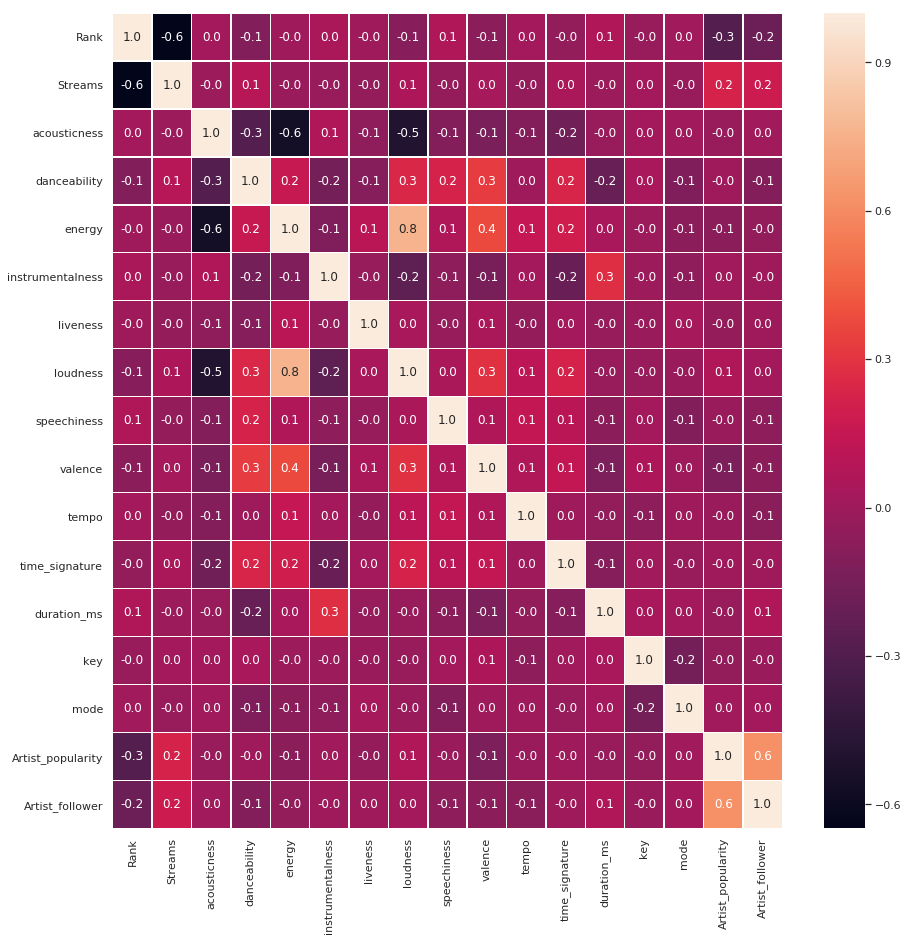

In [54]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(new_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

With the heatmap above we can see the characteristics that are paired the most in the list of most-streamed tracks.

Those variables are loudness and energy (0.8 correlation), energy and valence* (0.4 correlation) and valence and danceability (0.3 correlation).

*Valence is defined by Spotify as a measure of musical positiveness. For more information visit:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/
https://web.archive.org/web/20170422195736/http://blog.echonest.com/post/66097438564/plotting-musics-emotional-valence-1950-2013

## 5. Mean Values of the tracks and conclusion

Mean value for danceability: 0.6754379732090854


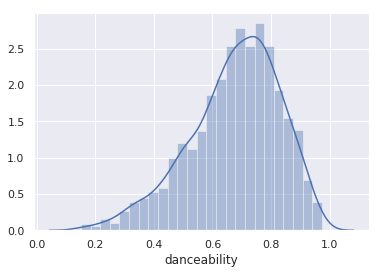

Mean value for energy: 0.624354397204426


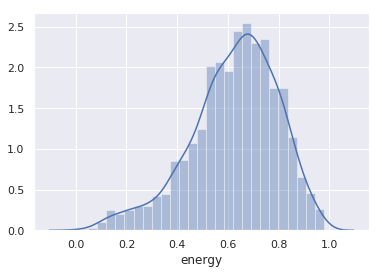

Mean value for mode: 0.5829935934769948


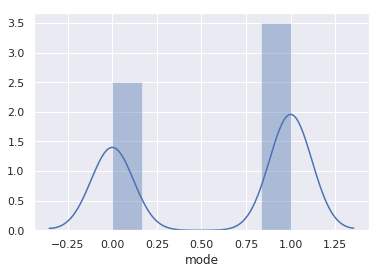

Mean value for speechiness: 0.12996686080372719


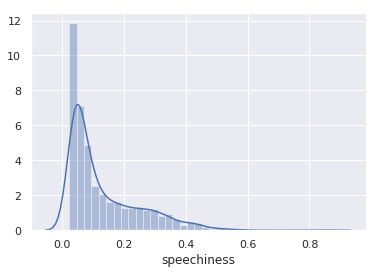

Mean value for acousticness: 0.2576517161910307


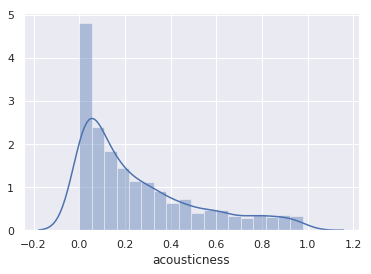

Mean value for instrumentalness: 0.01457733615026208


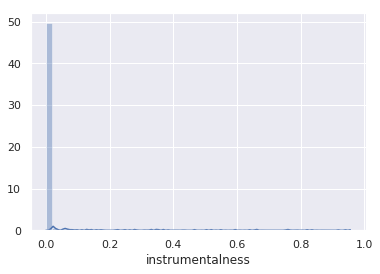

Mean value for liveness: 0.1743166569598139


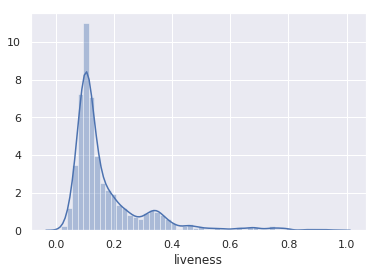

Mean value for valence: 0.48771863715783326


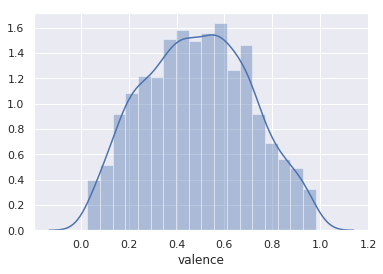

In [60]:
print("Mean value for danceability:", new_df['danceability'].mean())
sns.distplot(new_df['danceability'])
plt.show()
print("Mean value for energy:", new_df['energy'].mean())
sns.distplot(new_df['energy'])
plt.show()
print("Mean value for mode:", new_df['mode'].mean())
sns.distplot(new_df['mode'])
plt.show()
print("Mean value for speechiness:", new_df['speechiness'].mean())
sns.distplot(new_df['speechiness'])
plt.show()
print("Mean value for acousticness:", new_df['acousticness'].mean())
sns.distplot(new_df['acousticness'])
plt.show()
print("Mean value for instrumentalness:", new_df['instrumentalness'].mean())
sns.distplot(new_df['instrumentalness'])
plt.show()
print("Mean value for liveness:", new_df['liveness'].mean())
sns.distplot(new_df['liveness'])
plt.show()
print("Mean value for valence:", new_df['valence'].mean())
sns.distplot(new_df['valence'])
plt.show()

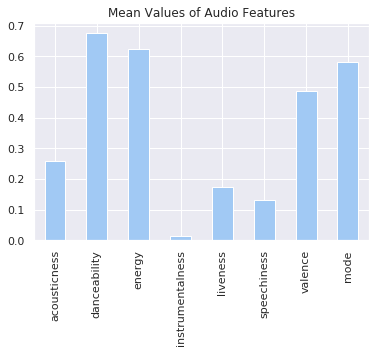

In [65]:
numeric = new_df.drop(['Rank','Streams','Artist_popularity', 'Artist_follower'], axis=1)
small = numeric.drop(['tempo','duration_ms','key', 'loudness', 'time_signature'], axis=1)
sns.set_palette('pastel')
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

As a conclusion, we can see on the graphic that danceability, energy and mode are the most common characteristics of the 2019 most streamed tracks on Spotify. We can infer from that that people tend to listen more to upbeat music which is represented by the mean values we have calculated.